In [2]:
import gensim

/Users/weixie/anaconda3/lib/python3.7/site-packages/smart_open/ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')


In [10]:
from gensim.models.doc2vec import TaggedDocument

In [13]:
sentence = TaggedDocument(words = ['some', 'words', 'here'], tags = ['SENT_1'])

In [16]:
from gensim.models import Doc2Vec
model = Doc2Vec(alpha=0.025, min_alpha=0.025)

In [22]:
model.build_vocab([sentence])

In [23]:
model.train([sentence])

RuntimeError: you must first build vocabulary before training the model

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [25]:
vect = TfidfVectorizer(min_df=1)

In [37]:
tfidf = vect.fit_transform(["A song named do not stop me now is played for you",
                             "playing do not stop you me now",
                             "Playing top 10 songs in billboard",
                             "Playing top 10 song in billboard"])

In [56]:
(tfidf * tfidf.T).A

array([[1.        , 0.63451666, 0.        , 0.11472208],
       [0.63451666, 1.        , 0.10150918, 0.10683297],
       [0.        , 0.10150918, 1.        , 0.78215739],
       [0.11472208, 0.10683297, 0.78215739, 1.        ]])

In [39]:
#---------------------------------
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [40]:
%matplotlib inline

In [44]:
df = pd.read_csv('sts-dev.csv',sep='\t',error_bad_lines=False)

b'Skipping line 1041: expected 7 fields, saw 8\nSkipping line 1065: expected 7 fields, saw 8\nSkipping line 1082: expected 7 fields, saw 8\nSkipping line 1136: expected 7 fields, saw 8\nSkipping line 1149: expected 7 fields, saw 8\nSkipping line 1449: expected 7 fields, saw 9\nSkipping line 1450: expected 7 fields, saw 9\nSkipping line 1451: expected 7 fields, saw 9\nSkipping line 1452: expected 7 fields, saw 9\nSkipping line 1453: expected 7 fields, saw 9\nSkipping line 1454: expected 7 fields, saw 9\nSkipping line 1455: expected 7 fields, saw 9\nSkipping line 1456: expected 7 fields, saw 9\nSkipping line 1457: expected 7 fields, saw 9\nSkipping line 1458: expected 7 fields, saw 9\nSkipping line 1459: expected 7 fields, saw 9\nSkipping line 1460: expected 7 fields, saw 9\nSkipping line 1461: expected 7 fields, saw 9\nSkipping line 1462: expected 7 fields, saw 9\nSkipping line 1463: expected 7 fields, saw 9\nSkipping line 1464: expected 7 fields, saw 9\nSkipping line 1465: expected 7 f

In [46]:
df.columns = ['captions', 'MSRvid', 'source', 'num', 'result', 'sen_1', 'sent_2']

In [47]:
df.head()

,captions,MSRvid,source,num,result,sen_1,sent_2
0,main-captions,MSRvid,2012test,2,4.750,A young child is riding a horse.,A child is riding a horse.
1,main-captions,MSRvid,2012test,3,5.000,A man is feeding a mouse to a snake.,The man is feeding a mouse to the snake.
2,main-captions,MSRvid,2012test,7,2.400,A woman is playing the guitar.,A man is playing guitar.
3,main-captions,MSRvid,2012test,8,2.750,A woman is playing the flute.,A man is playing a flute.
4,main-captions,MSRvid,2012test,10,2.615,A woman is cutting an onion.,A man is cutting onions.


In [49]:
df_feat = df.drop(['captions','MSRvid','source','num'], axis=1)

In [50]:
df_feat.head()

,result,sen_1,sent_2
0,4.750,A young child is riding a horse.,A child is riding a horse.
1,5.000,A man is feeding a mouse to a snake.,The man is feeding a mouse to the snake.
2,2.400,A woman is playing the guitar.,A man is playing guitar.
3,2.750,A woman is playing the flute.,A man is playing a flute.
4,2.615,A woman is cutting an onion.,A man is cutting onions.


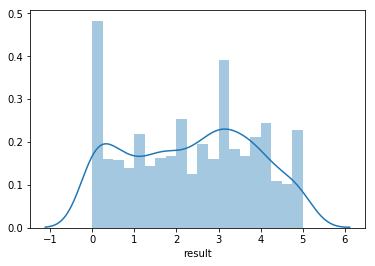

In [54]:
sns.distplot(df_feat['result'],bins=20)

In [ ]:
#lets calculate the TfidfVector
